[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kjmobile/lb/blob/main/1_LM_Simple_Linear_to_Polynomial_Regression_df.ipynb)

# From Simple Linear to Polynomial Regression

In this tutorial, we'll predict fish weight from length using two different models.

**Learning Goals:**
- Build a simple linear regression model
- Build a polynomial regression model
- Compare the performance of both models


## 1. Import Libraries

Let's import the tools we need.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## 2. Load and Explore Data

Let's load the fish dataset and take a look.


In [2]:
fish_df = pd.read_csv('https://raw.githubusercontent.com/kjmobile/data/refs/heads/main/ml/fish_l.csv')
fish_df.head()


,Species,Weight,Length,Height,Width
0,Bream,242.0,25.4,11.5200,4.0200
1,Bream,290.0,26.3,12.4800,4.3056
2,Bream,340.0,26.5,12.3778,4.6961
3,Bream,363.0,29.0,12.7300,4.4555
4,Bream,430.0,29.0,12.4440,5.1340


**Understanding the data:**
- `Length`: Fish length in inches
- `Weight`: Fish weight in pounds

Our goal is to predict weight from length!


In [3]:
# Check basic info
print(f"Number of fish: {len(fish_df)}")
print(f"Columns: {list(fish_df.columns)}")


Number of fish: 159
Columns: ['Species', 'Weight', 'Length', 'Height', 'Width']


### Split into Training and Test Sets

We'll split the data: 75% for training, 25% for testing.
- **Training data**: Used to teach the model
- **Test data**: Used to evaluate how well the model learned


In [4]:
train_df, test_df = train_test_split(fish_df, test_size=0.25, random_state=0)

train_X = train_df[['Length']]
train_y = train_df['Weight']
test_X = test_df[['Length']]
test_y = test_df['Weight']

print(f"Training set: {len(train_df)} fish")
print(f"Test set: {len(test_df)} fish")


Training set: 119 fish
Test set: 40 fish


---
## 3. Simple Linear Regression

Let's start with the simplest model: a straight line!

**Model equation:**

$$Weight = \beta_1 \times Length + \beta_0$$

- $\beta_1$: Slope (how much weight increases per inch of length)
- $\beta_0$: Intercept (predicted weight when length is 0)

We're fitting a straight line through our data points.


In [5]:
# Create and train the model
model_linear = LinearRegression()
model_linear.fit(train_X, train_y)


LinearRegression()

### Check What the Model Learned

Let's see what line the model found!


In [6]:
print(f"Slope (β₁): {model_linear.coef_[0]:.2f}")
print(f"Intercept (β₀): {model_linear.intercept_:.2f}")
print(f"\nEquation: Weight = {model_linear.coef_[0]:.2f} × Length + {model_linear.intercept_:.2f}")


Slope (β₁): 28.84
Intercept (β₀): -422.75

Equation: Weight = 28.84 × Length + -422.75


**What does this mean?**
- For every 1 inch increase in length, weight increases by ~β₁ pounds
- The equation lets us predict weight for any length!


### Evaluate the Model

How well does our model perform? We use **R² score** (ranges from 0 to 1).
- R² = 1.0 means perfect predictions
- R² = 0.0 means the model is no better than guessing the average


In [7]:
train_r2 = model_linear.score(train_X, train_y)
test_r2 = model_linear.score(test_X, test_y)

print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")


Training R²: 0.8221
Test R²: 0.8612


### Make a Prediction

Let's predict the weight of a 60-inch fish!


In [8]:
length_60 = pd.DataFrame({'Length': [60]})
predicted_weight = model_linear.predict(length_60)[0]
print(f"A 60-inch fish should weigh approximately {predicted_weight:.2f} lbs")


A 60-inch fish should weigh approximately 1307.62 lbs


### Visualize the Model

Let's see how well our straight line fits the data.


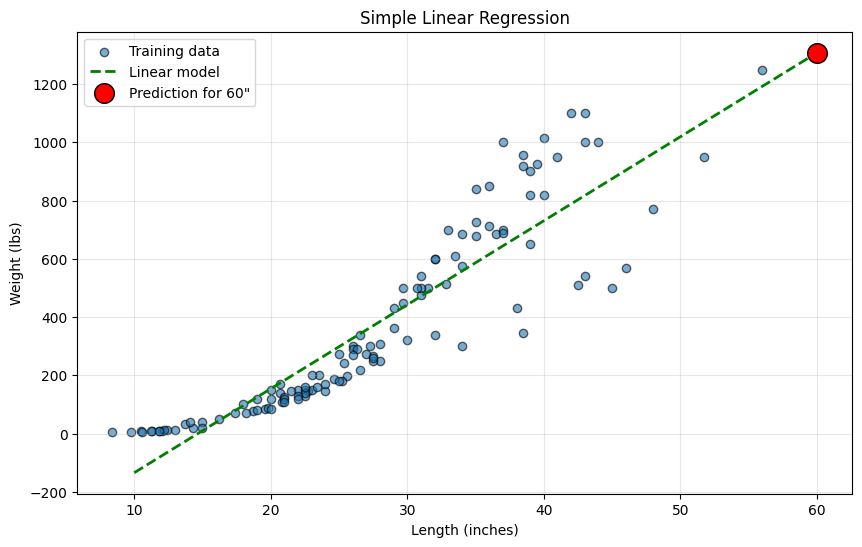

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(train_X['Length'], train_y, alpha=0.6, edgecolor='k', label='Training data')
plt.plot([10, 60], model_linear.predict(pd.DataFrame({'Length': [10, 60]})), 
         color='green', linewidth=2, linestyle='--', label='Linear model')
plt.scatter(60, predicted_weight, color='red', s=200, marker='o', 
           edgecolor='k', label='Prediction for 60"', zorder=5)
plt.xlabel('Length (inches)')
plt.ylabel('Weight (lbs)')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


**Observation:** 
The straight line doesn't quite capture the curve in the data. 
Maybe we need a more flexible model?


---
## 4. Polynomial Regression

Instead of a straight line, let's try a **curved line** (parabola)!

**Model equation:**

$$Weight = \beta_2 \times Length^2 + \beta_1 \times Length + \beta_0$$

- We add a **squared term** ($Length^2$) to capture curvature
- This allows the model to bend and fit the data better

**Key idea:** We're still using linear regression, but with an extra feature!


### Create Polynomial Features

We need to add a new column: Length²


In [10]:
# Add squared length to training data
train_X_poly = train_X.copy()
train_X_poly['Length²'] = train_X['Length'] ** 2
train_X_poly = train_X_poly[['Length²', 'Length']]  # Reorder columns

# Add squared length to test data
test_X_poly = test_X.copy()
test_X_poly['Length²'] = test_X['Length'] ** 2
test_X_poly = test_X_poly[['Length²', 'Length']]

print("Training data now has 2 features:")
train_X_poly.head()


Training data now has 2 features:


,Length²,Length
109,1075.84,32.8
74,225.00,15.0
97,576.00,24.0
27,1296.00,36.0
157,204.49,14.3


### Train the Polynomial Model


In [11]:
model_poly = LinearRegression()
model_poly.fit(train_X_poly, train_y)


LinearRegression()

### Check What the Model Learned


In [12]:
print(f"Coefficient for Length² (β₂): {model_poly.coef_[0]:.4f}")
print(f"Coefficient for Length (β₁): {model_poly.coef_[1]:.2f}")
print(f"Intercept (β₀): {model_poly.intercept_:.2f}")
print(f"\nEquation: Weight = {model_poly.coef_[0]:.4f} × Length² + {model_poly.coef_[1]:.2f} × Length + {model_poly.intercept_:.2f}")


Coefficient for Length² (β₂): 0.1829
Coefficient for Length (β₁): 18.31
Intercept (β₀): -290.02

Equation: Weight = 0.1829 × Length² + 18.31 × Length + -290.02


### Evaluate the Polynomial Model


In [13]:
train_r2_poly = model_poly.score(train_X_poly, train_y)
test_r2_poly = model_poly.score(test_X_poly, test_y)

print(f"Training R²: {train_r2_poly:.4f}")
print(f"Test R²: {test_r2_poly:.4f}")
print(f"\n{'='*40}")
print("COMPARISON:")
print(f"{'='*40}")
print(f"Linear model test R²:     {test_r2:.4f}")
print(f"Polynomial model test R²: {test_r2_poly:.4f}")
print(f"Improvement:              {(test_r2_poly - test_r2):.4f}")


Training R²: 0.8271
Test R²: 0.8896

COMPARISON:
Linear model test R²:     0.8612
Polynomial model test R²: 0.8896
Improvement:              0.0284


**What do we see?**
- The polynomial model has a higher R² score
- This means it fits the data better!


### Make a Prediction with Polynomial Model


In [14]:
length_60_poly = pd.DataFrame({'Length²': [60**2], 'Length': [60]})
predicted_weight_poly = model_poly.predict(length_60_poly)[0]

print(f"Polynomial model predicts: {predicted_weight_poly:.2f} lbs")
print(f"Linear model predicts:     {predicted_weight:.2f} lbs")
print(f"Difference:                {abs(predicted_weight_poly - predicted_weight):.2f} lbs")


Polynomial model predicts: 1466.95 lbs
Linear model predicts:     1307.62 lbs
Difference:                159.33 lbs


### Visualize the Polynomial Model


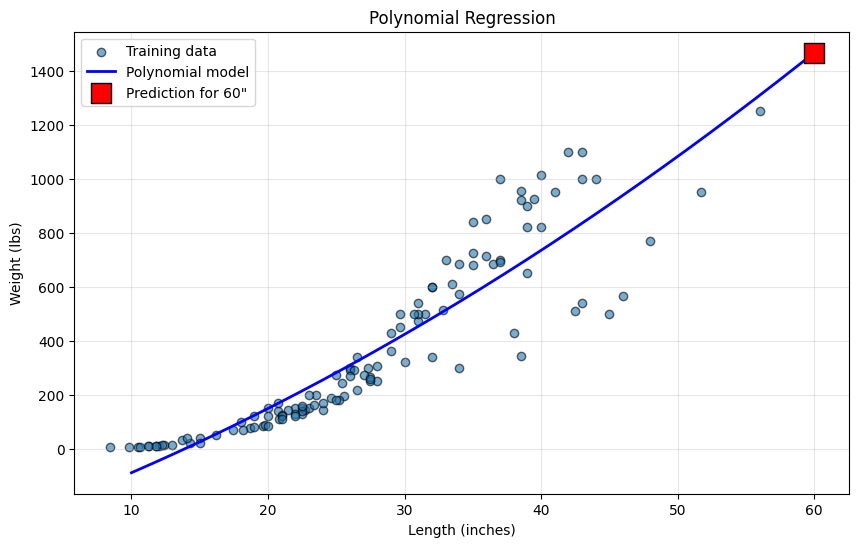

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(train_X['Length'], train_y, alpha=0.6, edgecolor='k', label='Training data')

# Draw the curved line
lengths = np.linspace(10, 60, 300)
predictions = model_poly.coef_[0] * lengths**2 + model_poly.coef_[1] * lengths + model_poly.intercept_
plt.plot(lengths, predictions, color='blue', linewidth=2, label='Polynomial model')

# Show prediction
plt.scatter(60, predicted_weight_poly, color='red', s=200, marker='s', 
           edgecolor='k', label='Prediction for 60"', zorder=5)

plt.xlabel('Length (inches)')
plt.ylabel('Weight (lbs)')
plt.title('Polynomial Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


**Observation:** 
The curved line follows the data much better than the straight line!


---
## 5. Side-by-Side Comparison

Let's compare both models visually.


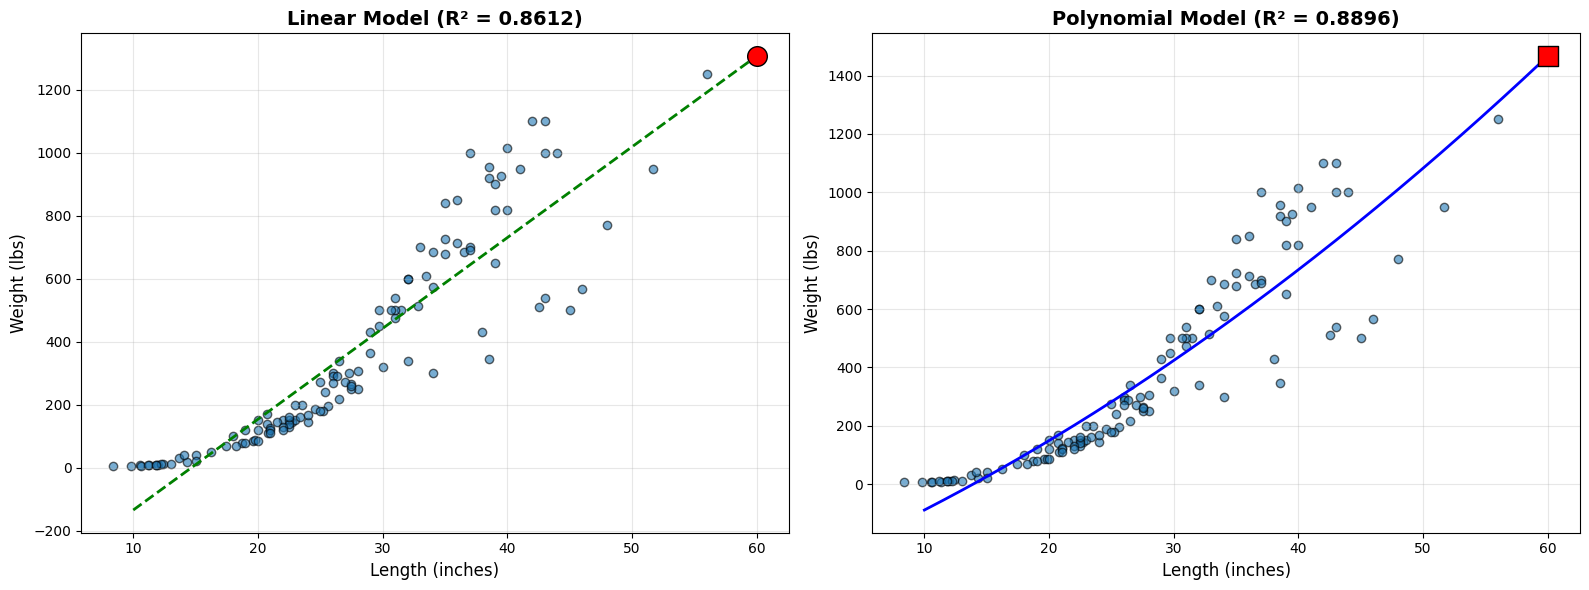

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Linear Regression
axes[0].scatter(train_X['Length'], train_y, alpha=0.6, edgecolor='k')
axes[0].plot([10, 60], model_linear.predict(pd.DataFrame({'Length': [10, 60]})), 
            color='green', linewidth=2, linestyle='--')
axes[0].scatter(60, predicted_weight, color='red', s=200, marker='o', edgecolor='k', zorder=5)
axes[0].set_xlabel('Length (inches)', fontsize=12)
axes[0].set_ylabel('Weight (lbs)', fontsize=12)
axes[0].set_title(f'Linear Model (R² = {test_r2:.4f})', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Polynomial Regression
axes[1].scatter(train_X['Length'], train_y, alpha=0.6, edgecolor='k')
lengths = np.linspace(10, 60, 300)
predictions = model_poly.coef_[0] * lengths**2 + model_poly.coef_[1] * lengths + model_poly.intercept_
axes[1].plot(lengths, predictions, color='blue', linewidth=2)
axes[1].scatter(60, predicted_weight_poly, color='red', s=200, marker='s', edgecolor='k', zorder=5)
axes[1].set_xlabel('Length (inches)', fontsize=12)
axes[1].set_ylabel('Weight (lbs)', fontsize=12)
axes[1].set_title(f'Polynomial Model (R² = {test_r2_poly:.4f})', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


---
## 6. Summary and Key Takeaways

**What we learned:**

1. **Simple Linear Regression** uses a straight line
   - Fast and easy to interpret
   - May not capture complex patterns

2. **Polynomial Regression** uses a curved line
   - More flexible, can fit curved patterns
   - Still uses linear regression (just with more features!)

3. **Model Comparison:**
   - We use R² score to compare model performance
   - Higher R² = better fit (but watch out for overfitting!)

**When to use which model?**
- If your data follows a straight line → Linear regression
- If your data curves → Try polynomial regression

---

## Try It Yourself!

**Challenge 1:** Change the `random_state` in train_test_split to 42. Do the R² scores change?

**Challenge 2:** Try creating a cubic model by adding a Length³ feature. Does it improve the R² score?

**Challenge 3:** Predict the weight for different lengths (e.g., 30 inches, 45 inches). Which model do you trust more?

**Challenge 4:** Plot both the linear and polynomial predictions on the same graph. Where do they differ most?


---


## Challenge 1: Change random_state to 42

**Question:** Change the `random_state` in train_test_split to 42. Do the R² scores change?

The R² scores should change slightly because we're splitting the data differently.


In [17]:
# Your answer

train_df1, test_df1 = train_test_split(fish_df, test_size=0.25, random_state=42)
train_X1 = train_df1[['Length']]
train_y1 = train_df1['Weight']
test_X1 = test_df1[['Length']]
test_y1 = test_df1['Weight']

model_linear_1=LinearRegression()
print(model_linear_1.fit(train_X1, train_y1))
print(model_linear_1.score(test_X1, test_y1))

LinearRegression()
0.8156142079322759


---
## Challenge 2: Create a Cubic Model

**Question:** Try creating a cubic model by adding a Length³ feature. Does it improve the R² score?

Let's add Length³ and see!


In [18]:
train_X_cubic

NameError: name 'train_X_cubic' is not defined

In [ ]:
# Your answer

train_X_cubic = train_X.copy()
train_X_cubic['Length³'] = train_X['Length'] ** 3
train_X_cubic['Length²'] = train_X['Length'] ** 2
train_X_cubic = train_X_cubic[['Length³', 'Length²', 'Length']]

test_X_cubic = test_X.copy()
test_X_cubic['Length³'] = test_X['Length'] ** 3
test_X_cubic['Length²'] = test_X['Length'] ** 2
test_X_cubic = test_X_cubic[['Length³', 'Length²', 'Length']]

model_cubic = LinearRegression()
model_cubic.fit(train_X_cubic, train_y)

print(f"Cubic model R²: {model_cubic.score(test_X_cubic, test_y):.4f}")
print(f"Polynomial R²:  {test_r2_poly:.4f}")
print(f"Linear R²:      {test_r2:.4f}")



In [ ]:
model_cubic.score(test_X_cubic, test_y)-test_r2_poly

---
## Challenge 3: Explain the code
Explain the code in detail. What does this do and how was it done?


In [ ]:
# Line 1: Creates a list of 6 different fish lengths to test
lengths = [20, 30, 40, 45, 50, 60]

for length in lengths:
    df_linear = pd.DataFrame({'Length': [length]})
    df_poly = pd.DataFrame({'Length²': [length**2], 'Length': [length]})
    pred_linear = model_linear.predict(df_linear)[0]
    pred_poly = model_poly.predict(df_poly)[0]
    
    print(f"Length {length}cm:")
    print(f"  Linear: {pred_linear:.2f}g")
    print(f"  Poly:   {pred_poly:.2f}g")
    print(f"  Diff:   {(pred_poly - pred_linear):.2f}g")
    print("-" * 20)